In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Units: Passengers per thousand
#Resources: 한국철도공사 및 (주)SR에서 제공하는「KTX, SRT 여객 수송 통계」

In [3]:
data = pd.read_excel('data.xls')

In [4]:
data

,Unnamed: 0,200404월,200405월,200406월,200407월,200408월,200409월,200410월,200411월,200412월,...,202105월,202106월,202107월,202108월,202109월,202110월,202111월,202112월,202201월,202202월
0,고속철도 여객수 계,"2,127","2,314","1,968","2,152","2,247","2,255","2,278","2,200","2,340",...,"5,910","5,729","5,071","5,024","5,130","6,427","6,866","6,375","5,798","4,959"
1,KTX이용률,61,65,57,61,65,65,65,66,65,...,70,71,59,57,60,74,85,74,67,62
2,SRT이용률,-,-,-,-,-,-,-,-,-,...,106,108,96,96,94,114,120,113,102,99
3,경부선 KTX여객수,"1,771","1,945","1,695","1,845","1,893","1,825","1,912","1,838","1,974",...,"2,102","2,060","1,770","1,695","1,799","2,292","2,521","2,280","2,079","1,754"
4,경부선 KTX이용률,70,75,67,72,75,73,76,76,75,...,66,68,56,53,58,71,82,72,65,60
5,경부선 SRT여객수,-,-,-,-,-,-,-,-,-,...,"1,292","1,249","1,158","1,132","1,107","1,365","1,382","1,356","1,258","1,111"
6,경부선 SRT이용률,-,-,-,-,-,-,-,-,-,...,112,116,102,102,100,121,128,120,108,105
7,호남선 KTX여객수,356,369,273,307,354,430,366,363,366,...,701,673,578,586,611,756,821,743,662,553
8,호남선 KTX이용률,38,39,30,32,37,45,38,39,37,...,66,62,52,51,55,66,74,65,59,53
9,호남선 SRT여객수,-,-,-,-,-,-,-,-,-,...,508,495,446,452,438,537,553,534,483,419


In [5]:
init = True
my_list = []
for c in data:
    if init == True:
        init = False
    else:
        temp_list = data[c].values
        for i in range(len(temp_list)):
            if temp_list[i] == '-':
                temp_list[i] = 0
        my_list.append(temp_list)


In [6]:
my_list = np.array(my_list)
rows = len(my_list)
cols = len(my_list[0])

In [7]:
for i in range(rows):
    for j in range(cols):
        my_list[i][j] = str(my_list[i][j])

In [8]:
for i in range(rows):
    for j in range(cols):
        remove_comma = my_list[i][j].replace(',','')
        f = float(remove_comma)
        my_list[i][j] = f

In [9]:
df1 = {}
df2 = {}
year = 2004
x = []
for m in range(4,13):
    if m < 10:
        x.append(str(0)+str(m)+'-01-'+str(year))
    else:
        x.append(str(m)+'-01-'+str(year))
year +=1
for y in range(18):
    for m in range(1,13):
        if m < 10:
            x.append(str(0)+str(m)+'-01-'+str(year))
        else:
            x.append(str(m)+'-01-'+str(year))
    year +=1

In [10]:
x = x[:-10]
len(x)

215

In [11]:
df1['Time'] = x
df1['Time'] = pd.to_datetime(df1['Time'])
time_series1 = pd.DataFrame(df1)
time_series1 = time_series1.set_index('Time')

In [12]:
df2['Time'] = x
df2['Time'] = pd.to_datetime(df2['Time'])
time_series2 = pd.DataFrame(df2)
time_series2 = time_series2.set_index('Time')

### High Speed Train Lines

In [13]:
ktx = 'KTX'
srt = 'SRT'
gyeongbu = 'Gyeongbu'
honam = 'Honam'
gyeongjeon = 'Gyeongjeon'
jeolla = 'Jeolla'
donghae = 'Donghae'

lines = [gyeongbu,honam,gyeongjeon,jeolla,donghae]
passengers = 'Passengers'
utility = 'Utility Rate'

In [14]:
total_list = ['Total Passengers']
utility_list = ['KTX Utility Rate','SRT Utility Rate']
concat = total_list + utility_list

for line in lines:
    if line == gyeongbu or line == honam:
        ktx_add = ktx + ' ' + line + ' ' + passengers
        total_list.append(ktx_add)
        concat.append(ktx_add)
        ktx_add = ktx + ' ' + line + ' ' + utility
        utility_list.append(ktx_add)
        concat.append(ktx_add)
        srt_add = srt + ' ' + line + ' ' + passengers
        total_list.append(srt_add)
        concat.append(srt_add)
        srt_add = srt + ' ' + line + ' ' + utility
        utility_list.append(srt_add)
        concat.append(srt_add)
    else:
        ktx_add = ktx + ' ' + line + ' ' + passengers
        total_list.append(ktx_add)
        concat.append(ktx_add)
        ktx_add = ktx + ' ' + line + ' ' + utility
        utility_list.append(ktx_add)
        concat.append(ktx_add)

In [15]:
total_list

['Total Passengers',
 'KTX Gyeongbu Passengers',
 'SRT Gyeongbu Passengers',
 'KTX Honam Passengers',
 'SRT Honam Passengers',
 'KTX Gyeongjeon Passengers',
 'KTX Jeolla Passengers',
 'KTX Donghae Passengers']

In [16]:
utility_list

['KTX Utility Rate',
 'SRT Utility Rate',
 'KTX Gyeongbu Utility Rate',
 'SRT Gyeongbu Utility Rate',
 'KTX Honam Utility Rate',
 'SRT Honam Utility Rate',
 'KTX Gyeongjeon Utility Rate',
 'KTX Jeolla Utility Rate',
 'KTX Donghae Utility Rate']

In [17]:
concat

['Total Passengers',
 'KTX Utility Rate',
 'SRT Utility Rate',
 'KTX Gyeongbu Passengers',
 'KTX Gyeongbu Utility Rate',
 'SRT Gyeongbu Passengers',
 'SRT Gyeongbu Utility Rate',
 'KTX Honam Passengers',
 'KTX Honam Utility Rate',
 'SRT Honam Passengers',
 'SRT Honam Utility Rate',
 'KTX Gyeongjeon Passengers',
 'KTX Gyeongjeon Utility Rate',
 'KTX Jeolla Passengers',
 'KTX Jeolla Utility Rate',
 'KTX Donghae Passengers',
 'KTX Donghae Utility Rate']

In [18]:
count = 0
for c in concat:
    temp = c[-4:len(c)]
    if temp == 'gers':
        time_series1[c] = np.array(list(my_list[:,count]))
    elif temp == 'Rate':
        time_series2[c] = np.array(list(my_list[:,count]))
    count +=1

In [19]:
time_series1

,Total Passengers,KTX Gyeongbu Passengers,SRT Gyeongbu Passengers,KTX Honam Passengers,SRT Honam Passengers,KTX Gyeongjeon Passengers,KTX Jeolla Passengers,KTX Donghae Passengers
Time,,,,,,,,
2004-04-01,2127.0,1771.0,0.0,356.0,0.0,0.0,0.0,0.0
2004-05-01,2314.0,1945.0,0.0,369.0,0.0,0.0,0.0,0.0
2004-06-01,1968.0,1695.0,0.0,273.0,0.0,0.0,0.0,0.0
2004-07-01,2152.0,1845.0,0.0,307.0,0.0,0.0,0.0,0.0
2004-08-01,2247.0,1893.0,0.0,354.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-10-01,6427.0,2292.0,1365.0,756.0,537.0,507.0,554.0,416.0
2021-11-01,6866.0,2521.0,1382.0,821.0,553.0,546.0,586.0,457.0
2021-12-01,6375.0,2280.0,1356.0,743.0,534.0,501.0,543.0,418.0


In [20]:
time_series1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2004-04-01 to 2022-02-01
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Passengers           215 non-null    float64
 1   KTX Gyeongbu Passengers    215 non-null    float64
 2   SRT Gyeongbu Passengers    215 non-null    float64
 3   KTX Honam Passengers       215 non-null    float64
 4   SRT Honam Passengers       215 non-null    float64
 5   KTX Gyeongjeon Passengers  215 non-null    float64
 6   KTX Jeolla Passengers      215 non-null    float64
 7   KTX Donghae Passengers     215 non-null    float64
dtypes: float64(8)
memory usage: 15.1 KB


In [21]:
time_series2

,KTX Utility Rate,SRT Utility Rate,KTX Gyeongbu Utility Rate,SRT Gyeongbu Utility Rate,KTX Honam Utility Rate,SRT Honam Utility Rate,KTX Gyeongjeon Utility Rate,KTX Jeolla Utility Rate,KTX Donghae Utility Rate
Time,,,,,,,,,
2004-04-01,61.0,0.0,70.0,0.0,38.0,0.0,0.0,0.0,0.0
2004-05-01,65.0,0.0,75.0,0.0,39.0,0.0,0.0,0.0,0.0
2004-06-01,57.0,0.0,67.0,0.0,30.0,0.0,0.0,0.0,0.0
2004-07-01,61.0,0.0,72.0,0.0,32.0,0.0,0.0,0.0,0.0
2004-08-01,65.0,0.0,75.0,0.0,37.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-10-01,74.0,114.0,71.0,121.0,66.0,100.0,86.0,84.0,85.0
2021-11-01,85.0,120.0,82.0,128.0,74.0,106.0,97.0,93.0,96.0
2021-12-01,74.0,113.0,72.0,120.0,65.0,98.0,86.0,83.0,85.0


In [22]:
time_series2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2004-04-01 to 2022-02-01
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   KTX Utility Rate             215 non-null    float64
 1   SRT Utility Rate             215 non-null    float64
 2   KTX Gyeongbu Utility Rate    215 non-null    float64
 3   SRT Gyeongbu Utility Rate    215 non-null    float64
 4   KTX Honam Utility Rate       215 non-null    float64
 5   SRT Honam Utility Rate       215 non-null    float64
 6   KTX Gyeongjeon Utility Rate  215 non-null    float64
 7   KTX Jeolla Utility Rate      215 non-null    float64
 8   KTX Donghae Utility Rate     215 non-null    float64
dtypes: float64(9)
memory usage: 16.8 KB


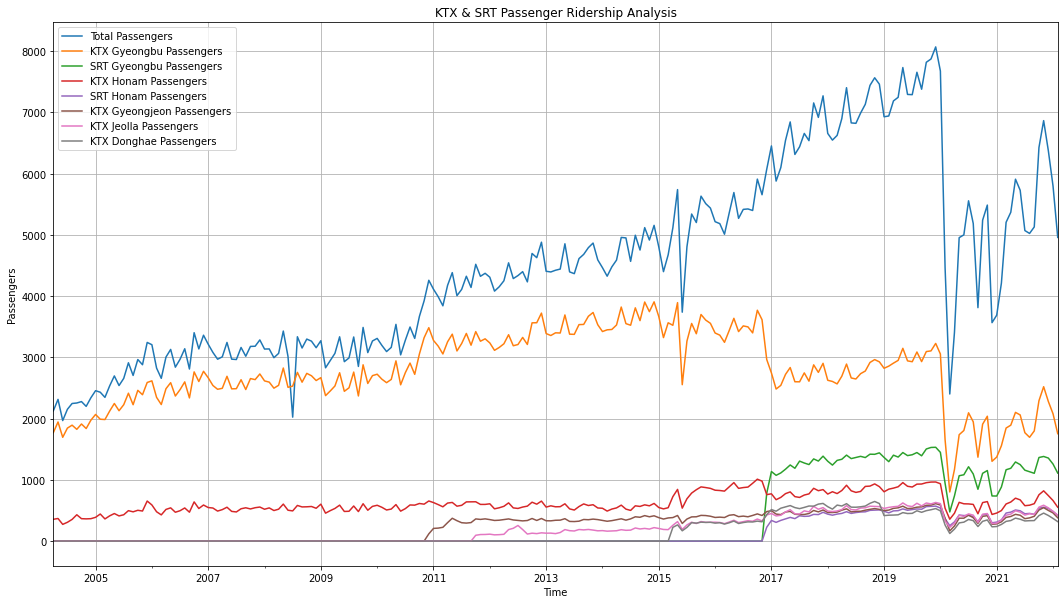

In [23]:
ax1 = time_series1.plot(figsize=(18,10),grid=True)
ax1.set_ylabel('Passengers')
plt.title('KTX & SRT Passenger Ridership Analysis')
plt.savefig('data_explore/passen_analysis.png')

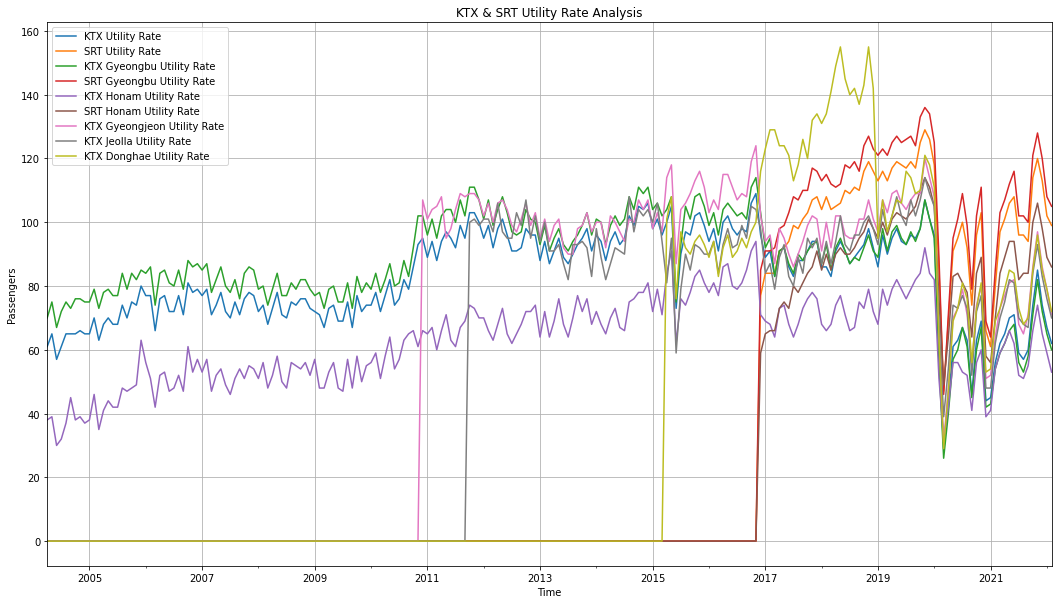

In [24]:
ax2 = time_series2.plot(figsize=(18,10),grid=True)
ax2.set_ylabel('Passengers')
plt.title('KTX & SRT Utility Rate Analysis')
plt.savefig('data_explore/utility_analysis.png')

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

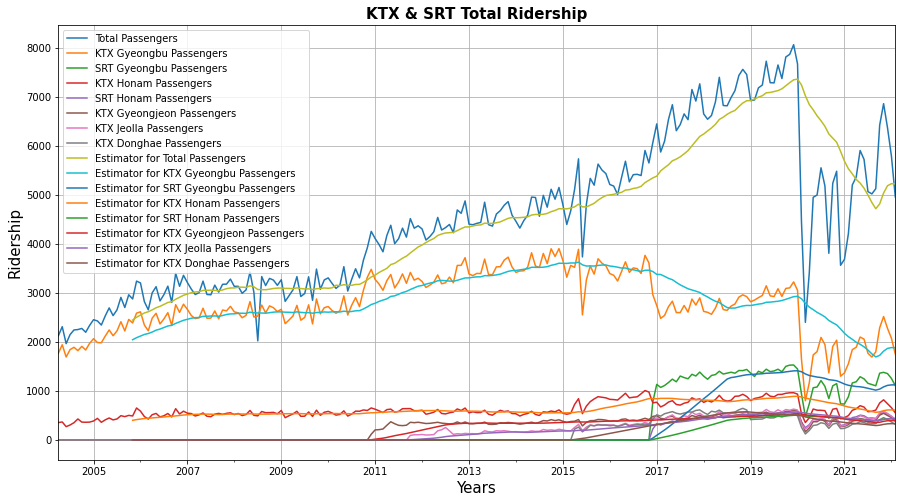

In [26]:
time_series1[total_list].plot(figsize=(15,8))
for t in total_list:
    time_series1.rolling(window=20).mean()[t].plot(label='Estimator for '+t)
plt.grid()
plt.xlabel('Years',fontsize=15)
plt.ylabel('Ridership',fontsize=15)
plt.title('KTX & SRT Total Ridership',fontsize=15,fontweight='bold')
plt.legend()
plt.savefig('data_explore/passen_est.png')

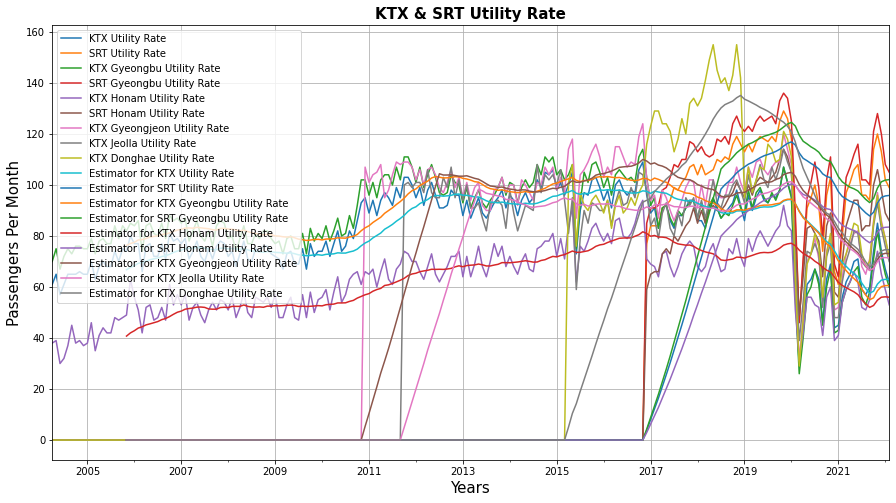

In [27]:
time_series2[utility_list].plot(figsize=(15,8))
for u in utility_list:
    time_series2.rolling(window=20).mean()[u].plot(label='Estimator for '+u)
plt.grid()
plt.xlabel('Years',fontsize=15)
plt.ylabel('Passengers Per Month',fontsize=15)
plt.title('KTX & SRT Utility Rate',fontsize=15,fontweight='bold')
plt.legend()
plt.savefig('data_explore/utility_est.png')

In [28]:
training_df1 = time_series1.iloc[:int(0.89*len(time_series1))]
test_df1 = time_series1.iloc[int(0.88*len(time_series1)):]

In [29]:
colors = ['b','g','r','c','m','y']
count = 0

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred

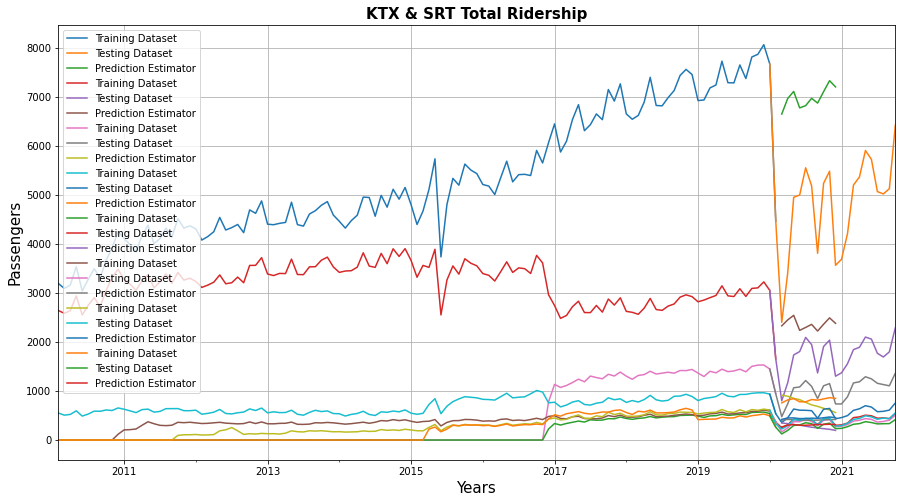

In [30]:
for total_elem in total_list:
    fit_model1 = ExponentialSmoothing(training_df1[total_elem],trend='add',seasonal='add',seasonal_periods=30).fit()
    prediction1 = fit_model1.forecast(10)
    training_df1[total_elem].plot(figsize=(15,8),label='Training Dataset')
    test_df1[total_elem].plot(label='Testing Dataset')
    prediction1.plot(xlim=['2010-02-01','2021-10-01'],label='Prediction Estimator')
    plt.grid()
    plt.xlabel('Years',fontsize=15)
    plt.ylabel('Passengers',fontsize=15)
    plt.title('KTX & SRT Total Ridership',fontsize=15,fontweight='bold')
    plt.legend()

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred

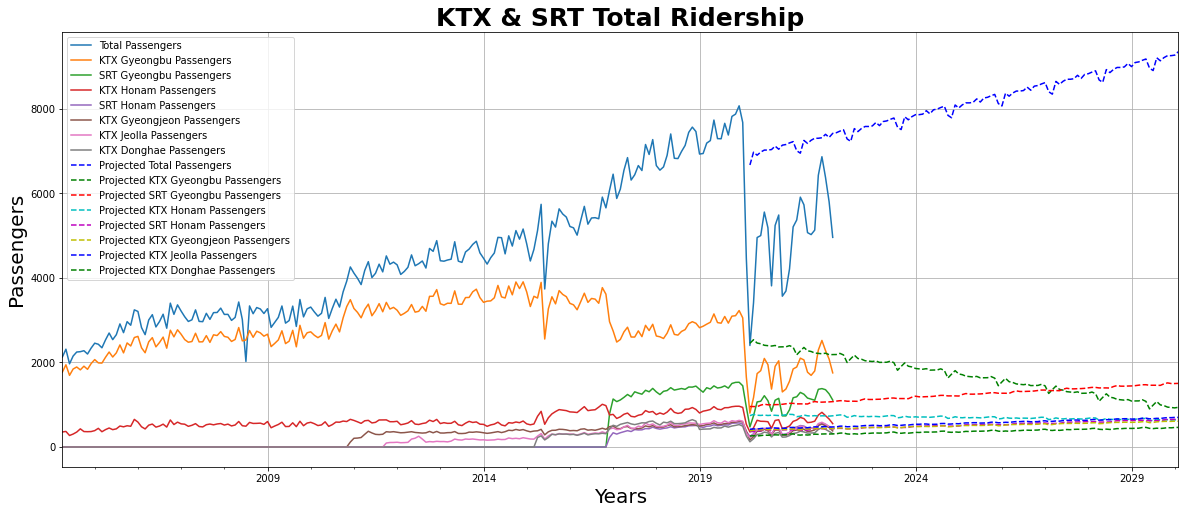

In [31]:
time_series1.plot(figsize=(20,8))
for total_elem in total_list:
    traffic_model1 = ExponentialSmoothing(training_df1[total_elem],trend='add',seasonal='add',seasonal_periods=14).fit()
    passenger_forecast1 = traffic_model1.forecast(120)
    passenger_forecast1.plot(label='Projected ' + total_elem,style='--',color=colors[count%len(colors)])
    plt.grid()
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Passengers',fontsize=20)
    plt.title('KTX & SRT Total Ridership',fontsize=25,fontweight='bold')
    plt.legend()
    count +=1
    plt.savefig('data_explore/passen_pred.png')

In [32]:
training_df2 = time_series2.iloc[:int(0.89*len(time_series2))]
test_df2 = time_series2.iloc[int(0.88*len(time_series2)):]

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred

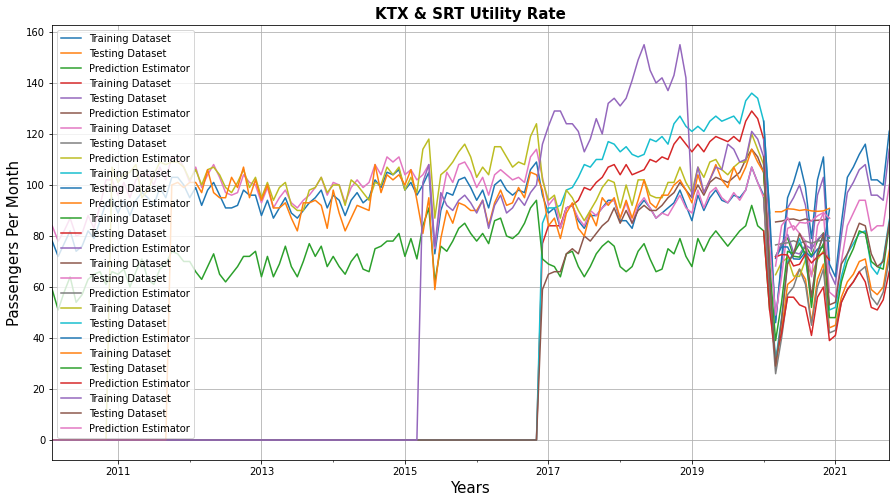

In [33]:
for utility_elem in utility_list:
    fit_model2 = ExponentialSmoothing(training_df2[utility_elem],trend='add',seasonal='add',seasonal_periods=30).fit()
    prediction2 = fit_model2.forecast(10)
    training_df2[utility_elem].plot(figsize=(15,8),label='Training Dataset')
    test_df2[utility_elem].plot(label='Testing Dataset')
    prediction2.plot(xlim=['2010-02-01','2021-10-01'],label='Prediction Estimator')
    plt.grid()
    plt.xlabel('Years',fontsize=15)
    plt.ylabel('Passengers Per Month',fontsize=15)
    plt.title('KTX & SRT Utility Rate',fontsize=15,fontweight='bold')
    plt.legend()

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred

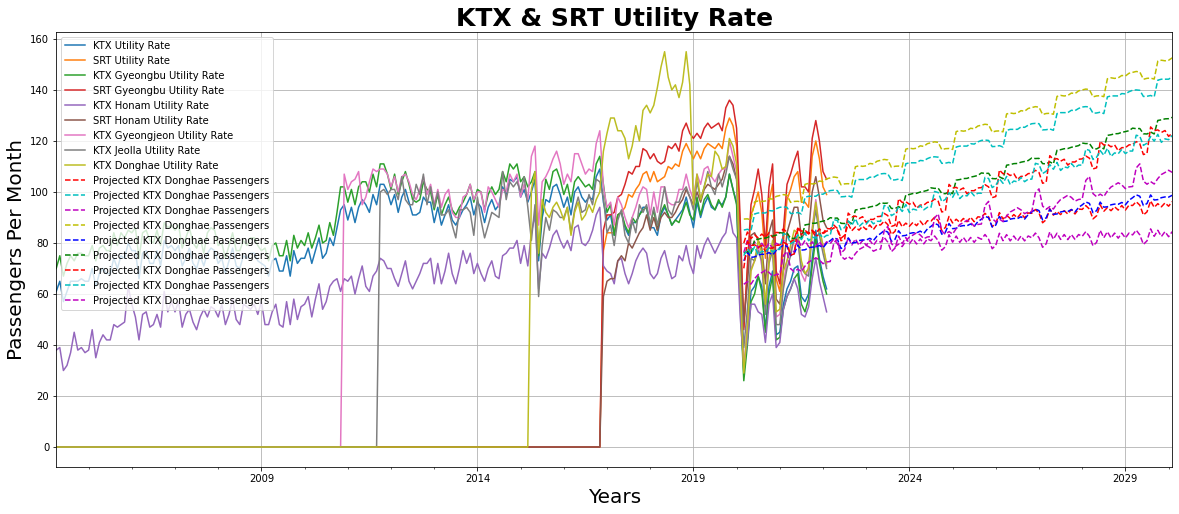

In [34]:
time_series2.plot(figsize=(20,8))
for utility_elem in utility_list:
    traffic_model2 = ExponentialSmoothing(training_df2[utility_elem],trend='add',seasonal='add',seasonal_periods=14).fit()
    passenger_forecast2 = traffic_model2.forecast(120)
    passenger_forecast2.plot(label='Projected ' + total_elem,style='--',color=colors[count%len(colors)])
    plt.grid()
    plt.xlabel('Years',fontsize=20)
    plt.ylabel('Passengers Per Month',fontsize=20)
    plt.title('KTX & SRT Utility Rate',fontsize=25,fontweight='bold')
    plt.legend()
    count +=1
    plt.savefig('data_explore/utility_pred.png')